#### Ibrahim Johar Farooqi
#### 23K-0074
#### ML - Lab 02 - Tasks

#### task 01

A. Download the dataset and explore how to merge these dataset

B. Combine dataset Lab2 D1A with Lab2 D1B in such a way that it doesn’t contain any
duplicate column. The resultant dataset consist of these columns and the final shape will be:

Index(['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level',
       'enrollment', 'level.1'],
      dtype='object')


Final Records : (27032, 9)


C. Combine dataset Lab2 D1A with Lab2 D1C using merge method to extract similar records
in a new Dataframe “comboAC” having 4221333 records:

(4221333, 7)


Index(['fid', 'name', 'population', 'county', 'latitude', 'city', 'score'], dtype='object')

In [2]:
import pandas as pd

#d1 = D1A, d2 = D1B, d3 = D1C

d1 = pd.read_csv("Lab2 D1A.csv")
d2 = pd.read_csv("Lab2 D1B.csv")
d3 = pd.read_csv("Lab2 D1C.csv")

In [3]:
d1.head()

,fid,name,population,county,latitude
0,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597
1,9002,SETON ACADEMY FOR GIRLS,57,BRISTOL,41.718407
2,9003,ST ANNA SCHOOL,157,WORCESTER,42.517271
3,9004,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,41.818210
4,9005,DEVEREUX SCHOOL,123,WORCESTER,42.383875


In [4]:
d2.head()

,name,population,county,longitude,level,enrollment,level.1
0,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary
1,SETON ACADEMY FOR GIRLS,57,BRISTOL,-71.147302,Elementary,49,Elementary
2,ST ANNA SCHOOL,157,WORCESTER,-71.751741,Elementary,143,Elementary
3,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,-71.083393,Elementary,4,Elementary
4,DEVEREUX SCHOOL,123,WORCESTER,-71.968419,Combined elementary and secondary,107,Combined elementary and secondary


In [5]:
d3.head()

,county,city,score
0,BRISTOL,SWANSEA,16
1,BRISTOL,FALL RIVER,8
2,WORCESTER,LEOMINSTER,14
3,PLYMOUTH,MIDDLEBORO,1
4,WORCESTER,RUTLAND,16


In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26983 entries, 0 to 26982
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fid         26983 non-null  int64  
 1   name        26983 non-null  object 
 2   population  26983 non-null  int64  
 3   county      26983 non-null  object 
 4   latitude    26983 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.0+ MB


In [7]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26983 entries, 0 to 26982
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        26983 non-null  object 
 1   population  26983 non-null  int64  
 2   county      26983 non-null  object 
 3   longitude   26983 non-null  float64
 4   level       26983 non-null  object 
 5   enrollment  26983 non-null  int64  
 6   level.1     26983 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.4+ MB


In [8]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26983 entries, 0 to 26982
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   county  26983 non-null  object
 1   city    26983 non-null  object
 2   score   26983 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 632.5+ KB


In [13]:
#B
d1_d2_merged = pd.merge(d1, d2, on=["name", "population", "county"], how="outer")

print(d1_d2_merged.columns)
print(f"final records: {d1_d2_merged.shape}")

Index(['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level',
       'enrollment', 'level.1'],
      dtype='object')
final records: (27033, 9)


In [14]:
#C
comboAC = pd.merge(d1, d3, on=["county"], how="outer")

print(comboAC.shape)
print(comboAC.columns)

(4221333, 7)
Index(['fid', 'name', 'population', 'county', 'latitude', 'city', 'score'], dtype='object')


#### task 02

A. Customized you own dataset with the name “customizedData”, add at least one attribute
that should be similar to Lab2 D1A, Lab2 D1B, Lab2 D1C dataset , now add 3 attributes
of Size (small, ,medium, and high), cardinal direction ( North, South, East and West) ,
Timings (full time , part time) and add 2 attributes of your own choice, one attribute should
be categorical and one should be continuous.


B. Merge “customizedData” with Lab2 D1A, Lab2 D1B, Lab2 D1C and produce a resultand
dataset with the name of “modifiedData” and explore/ analyze its number of records and
features before and after merging with the technique of similar records joining.

In [31]:
#A
import numpy as np

customizedData = pd.DataFrame({
    "county": ["BRISTOL", "WORCESTER", "PLYMOUTH", "FRANKLIN", "HAMPDEN"],
    #required attributes
    "size": ["small", "medium", "high", "medium", "small"],
    "direction": ["North", "South", "East", "West", "North"],
    "timings": ["full time", "part time", "full time", "part time", "full time"],
    #custom attributes
    "infrastructure": ["basic", "standard", "advanced", "standard", "basic"],  #categorical
    "avg_income": [25000.5, 30000.0, 28000.7, 31000.2, 26000.8]               #continuous
})

custom_df = pd.DataFrame(customizedData)

In [18]:
custom_df.head(5)

,county,size,direction,timings,infrastructure,avg_income
0,BRISTOL,small,North,full time,basic,25000.5
1,WORCESTER,medium,South,part time,standard,30000.0
2,PLYMOUTH,high,East,full time,advanced,28000.7
3,FRANKLIN,medium,West,part time,standard,31000.2
4,HAMPDEN,small,North,full time,basic,26000.8


In [23]:
print(f"shape: {custom_df.shape}")
print(f"size: {custom_df.size}")
print(f"cols:\n{custom_df.columns}")

shape: (5, 6)
size: 30
cols:
Index(['county', 'size', 'direction', 'timings', 'infrastructure',
       'avg_income'],
      dtype='object')


In [32]:
#B
print(f"D1A shape: {d1.shape}")
print(f"D1B shape: {d2.shape}")
print(f"D1C shape: {d3.shape}")
print(f"CustomizedData shape: {custom_df.shape}")

mergedData = pd.merge(custom_df, d1, how="inner", on="county")
mergedData = pd.merge(mergedData, d2, how="inner", on=['county', 'name', 'population'])
mergedData = pd.merge(mergedData, d3, how="inner", on="county")

print("\nmerged data:\n", mergedData.head())
print(f"\nmergedData shape: {mergedData.shape}")
print(f"\nmergedData columns: \n{mergedData.columns}")

D1A shape: (26983, 5)
D1B shape: (26983, 7)
D1C shape: (26983, 3)
CustomizedData shape: (5, 6)

merged data:
     county   size direction    timings infrastructure  avg_income   fid  \
0  BRISTOL  small     North  full time          basic     25000.5  9001   
1  BRISTOL  small     North  full time          basic     25000.5  9001   
2  BRISTOL  small     North  full time          basic     25000.5  9001   
3  BRISTOL  small     North  full time          basic     25000.5  9001   
4  BRISTOL  small     North  full time          basic     25000.5  9001   

                            name  population   latitude  longitude  \
0  NEW ENGLAND CHRISTIAN ACADEMY         136  41.758597 -71.175801   
1  NEW ENGLAND CHRISTIAN ACADEMY         136  41.758597 -71.175801   
2  NEW ENGLAND CHRISTIAN ACADEMY         136  41.758597 -71.175801   
3  NEW ENGLAND CHRISTIAN ACADEMY         136  41.758597 -71.175801   
4  NEW ENGLAND CHRISTIAN ACADEMY         136  41.758597 -71.175801   

                  

#### task 03

How to organize your code (Create a Text block for Importing Libraries in next cell import required library now Create a Heading for Data Preprocessing and the add a new cell for Data analysis. Create headings for each cell)

A. Download the dataset from Here

B. Import your dataset in Colab or Jupyter notebook

C. Calculate the correlation between these variables,Var3,Var38,Var15, imp_op_var39_comer_ult1

D. Check whether the data is linear or not and write a brief explanation what you have analyzed in text cell

E. Check whether the data contain any missing record, if yes then perform imputation using an average method.

F. In your dataset, you have some interesting variables. Think of multi-variable research questions that you can explore with these data and explore. You need to do at least 5 explorations that include data visualizations, numerical summary.

G. Find out the unique category in target variable and check whether your dataset is balanced or not.

H. If dataset is not balanced, then handle your dataset and balance it using Up sampling

I. Find out the total number of features and records and perform feature selection using Pearson Correlation having threshold equal to 65%.

J. Make a copy of your dataset and perform feature selection other than Pearson and Variance threshold.

In [2]:
#A, B

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
print(f"train.csv shape: {df.shape}")

train.csv shape: (76020, 371)


In [36]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [37]:
df.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [38]:
#C

corr_matrix = df[['var3', 'var38', 'var15', 'imp_op_var39_comer_ult1']].corr()

corr_matrix

,var3,var38,var15,imp_op_var39_comer_ult1
var3,1.000000,0.000071,-0.004452,0.005989
var38,0.000071,1.000000,0.006497,0.012546
var15,-0.004452,0.006497,1.000000,0.094762
imp_op_var39_comer_ult1,0.005989,0.012546,0.094762,1.000000


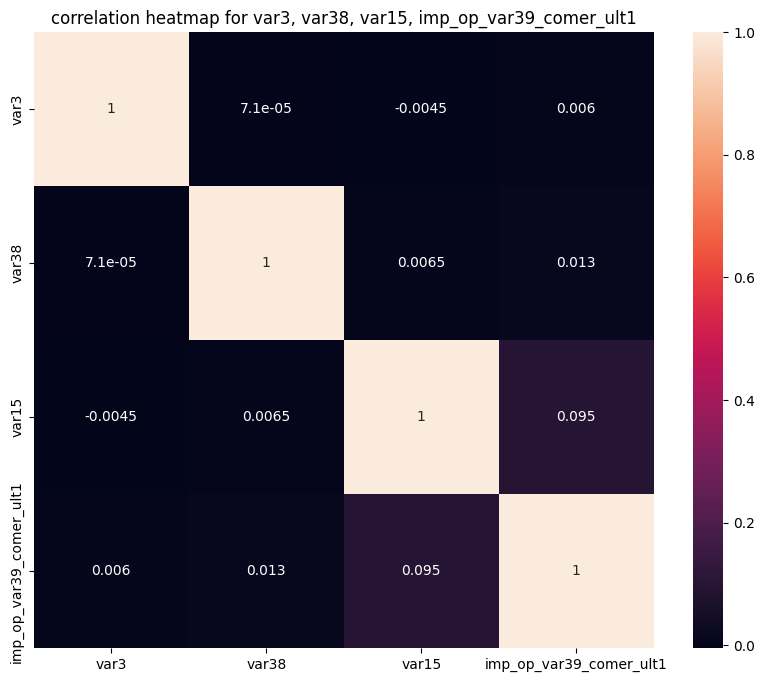

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True)
plt.title('correlation heatmap for var3, var38, var15, imp_op_var39_comer_ult1')
plt.show()

<Figure size 1000x600 with 0 Axes>

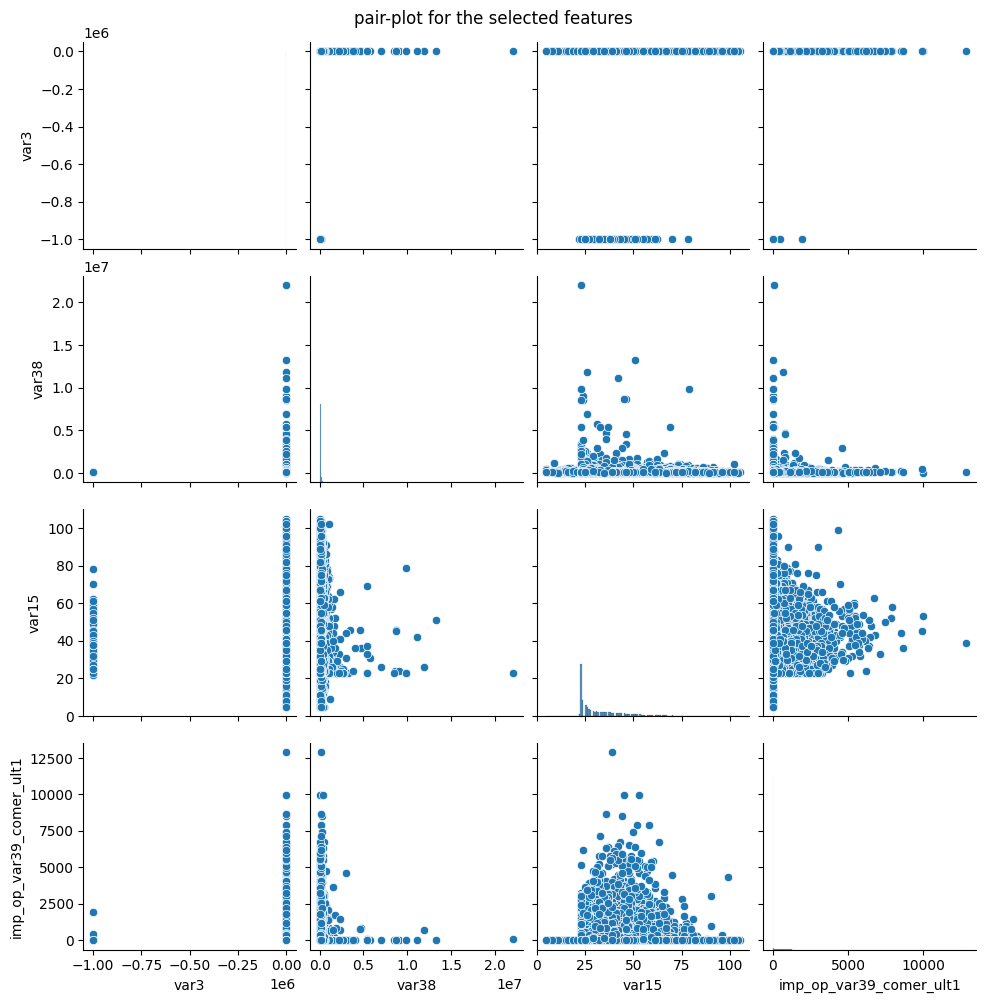

In [48]:
#D

plt.figure(figsize=(10,6))
select_features = ['var3', 'var38', 'var15', 'imp_op_var39_comer_ult1']
sns.pairplot(df[select_features])
plt.suptitle('pair-plot for the selected features', y=1)
plt.show()

as seen in the heatmaps and the pairplots the data isnt linear as there is no strong correlation between the features. 

In [49]:
#E

df.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

no null values in the dataset

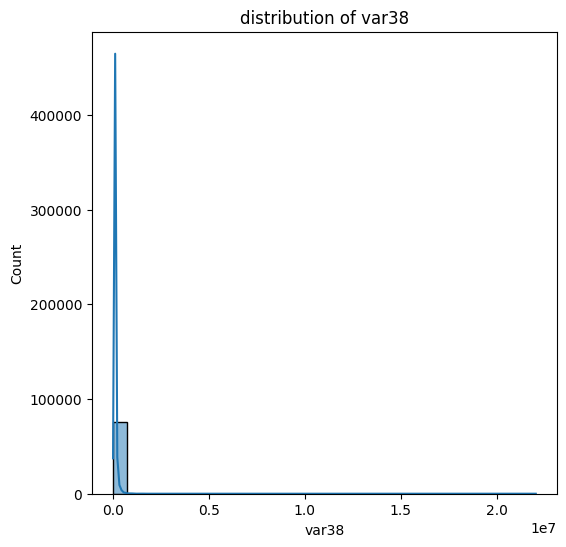

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64


In [ ]:
#F
#1. what is the distribution of 'Var38' in the dataset?
plt.figure(figsize=(6,6))
sns.histplot(df['var38'], kde=True, bins=30)
plt.title("distribution of var38")
plt.show()

print(df['var38'].describe())


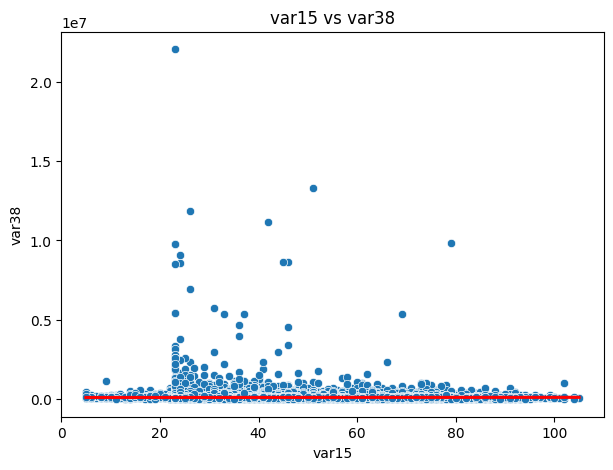

Correlation: 0.0064965901030005985


In [ ]:
#2. is there a correlation between var15 and var38?

plt.figure(figsize=(7,5))
sns.scatterplot(x='var15', y='var38', data=df, alpha=1)
sns.regplot(x='var15', y='var38', data=df, scatter=False, color="red")
plt.title("var15 vs var38")
plt.show()

print("Correlation:", df['var15'].corr(df['var38']))

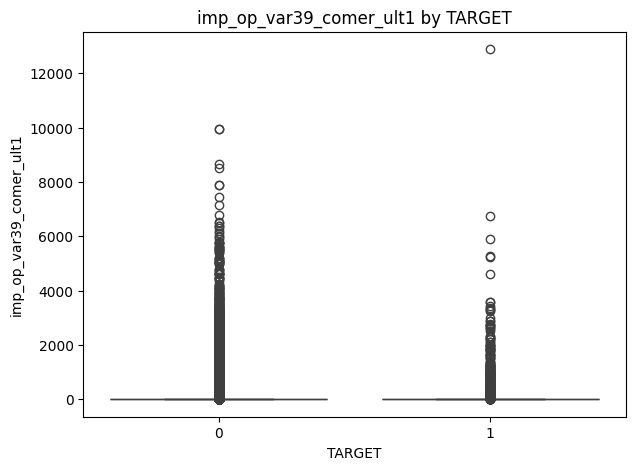

TARGET
0    71.650026
1    89.670439
Name: imp_op_var39_comer_ult1, dtype: float64


In [63]:
#3. does the variable imp_op_var39_comer_ult1 differ across target classes?
plt.figure(figsize=(7,5))
sns.boxplot(x='TARGET', y='imp_op_var39_comer_ult1', data=df)
plt.title("imp_op_var39_comer_ult1 by TARGET")
plt.show()

print(df.groupby('TARGET')['imp_op_var39_comer_ult1'].mean())


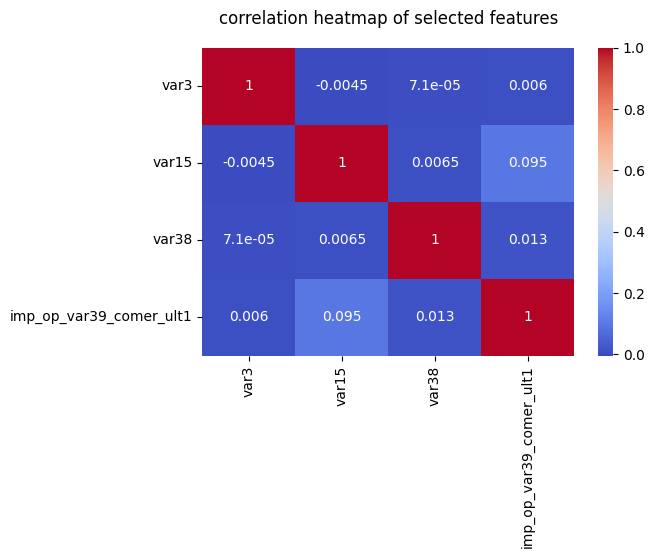

In [65]:
#4. how strongly are the selected variables correlated with each other?

vars = ['var3','var15','var38','imp_op_var39_comer_ult1']
plt.figure(figsize=(6,4))
sns.heatmap(df[vars].corr(), annot=True, cmap="coolwarm")
plt.title("correlation heatmap of selected features", y=1.05)
plt.show()

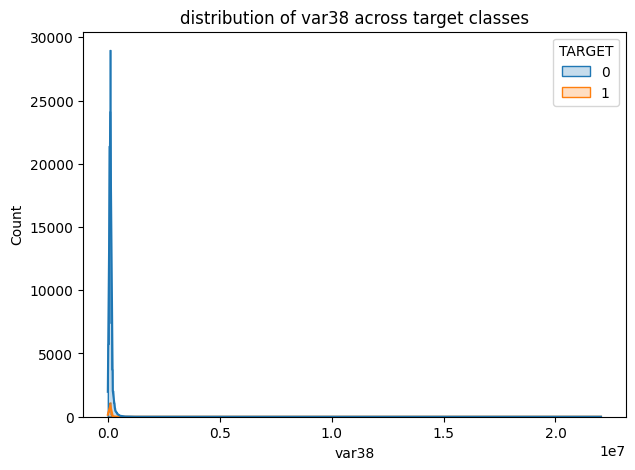

          count           mean            std       min         25%  \
TARGET                                                                
0       73012.0  117959.156918  185100.867998   5163.75  68432.7375   
1        3008.0   99678.280590  106309.811490  11136.63  57160.9425   

              50%            75%          max  
TARGET                                         
0       107207.82  119742.270000  22034738.76  
1        86219.97  117310.979016   3988595.10  


In [70]:
#5. do higher values of Var38 increase the likelihood of belonging to target class 1?

plt.figure(figsize=(7,5))
sns.histplot(data=df, x='var38', hue='TARGET', kde=True, element='step')
plt.title("distribution of var38 across target classes")
plt.show()

print(df.groupby('TARGET')['var38'].describe())

In [72]:
#G

print("unique values in TARGET:", df['TARGET'].unique())

unique values in TARGET: [0 1]


In [73]:
print(df['TARGET'].value_counts())

TARGET
0    73012
1     3008
Name: count, dtype: int64


the target variable has two categories: 0 and 1. the distribution is highly imbalanced, with class 0 representing almost 96% of the records & class 1 representing almost 4%.

In [3]:
#H
from imblearn.over_sampling import SMOTE

X = df.drop("TARGET", axis=1)
y = df["TARGET"]

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

TARGET
0    73012
1    73012
Name: count, dtype: int64


In [4]:
#I

corr_target = df.corr()["TARGET"].abs()
select_features = corr_target[corr_target > 0.65]
print(f"select features: {select_features}")

select features: TARGET    1.0
Name: TARGET, dtype: float64


In [5]:
#J
from sklearn.feature_selection import SelectKBest

df_copy = df.copy()

X = df_copy.drop("TARGET", axis=1)
Y = df_copy["TARGET"]

selector = SelectKBest(k=5)

X_new = selector.fit_transform(X,Y)

selected_features = X.columns[selector.get_support()]

print(selected_features.tolist())


['ind_var5', 'ind_var30', 'num_var30', 'num_var42', 'num_meses_var5_ult3']


C:\Users\ibrah\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ibrah\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#### task 04

A. Create a survey form (ask for the approval in order to avoid duplicate content) , ask some questions , Make sure to choose your question wisely, your attributes should reflect more to your problem statement. User have to answer atleast 5 questions and the remaining one will be depend on user, whether to answer or not.

B. The questionnaire will contains at least 10 questions and you have to collect dataset from minimum 100 individuals

C. After collecting dataset, Perform some Statistical analysis over it, Do some Graphical Visualization, Check whether the dataset you have collected is balanced or not.

D. Perform Data wrangling, If the dataset contain any missing records try to handle these missing values wisely.

E. If you found your dataset is not balanced then choose a technique other than smote or NearMiss

F. Perform feature selection technique other than Variance Threshold and Pearson correlation and explain in a text cell its working.

G. If the dataset contain any categorical feature then encode it using Dummy Encoding, and explain the difference between dummy encoding and one hot encoding

H. Check whether your dataset contain any duplicate records, if it does, then handle these records with atleast 2 techniques.

In [6]:
#need guidance on this question from lab instructor.